100%|██████████| 1159/1159 [00:01<00:00, 821.63it/s]


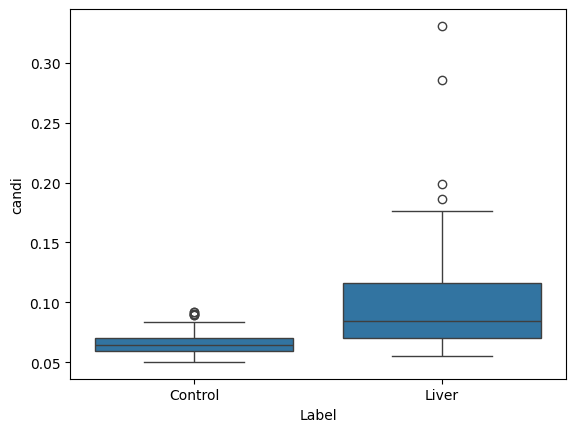

100%|██████████| 1159/1159 [00:01<00:00, 837.24it/s]


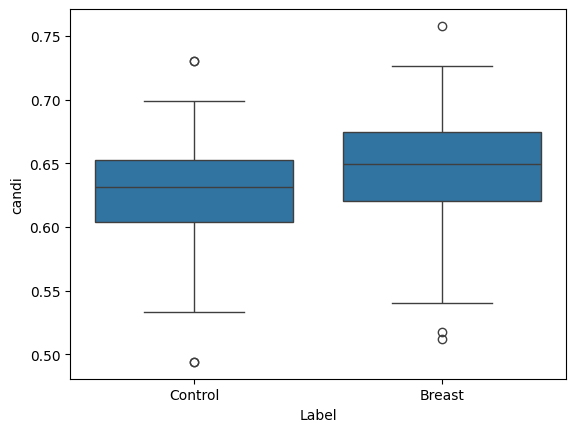

100%|██████████| 1159/1159 [00:01<00:00, 837.14it/s]


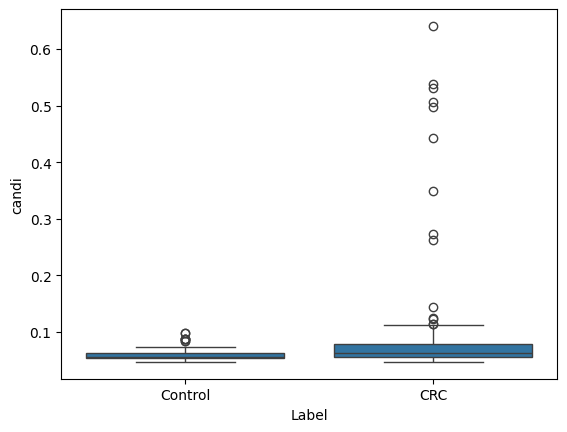

100%|██████████| 1159/1159 [00:01<00:00, 824.95it/s]


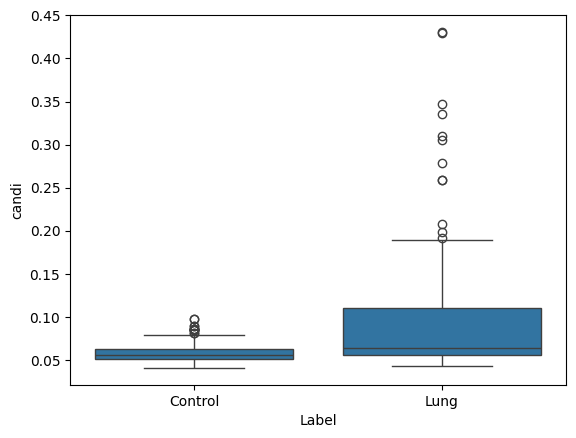

100%|██████████| 1159/1159 [00:01<00:00, 810.96it/s]


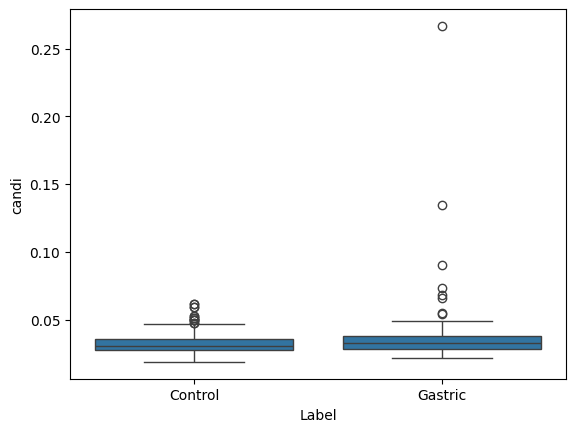

In [34]:
import pandas as pd
import numpy as np
import pathlib 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

path_to_main_src = pathlib.Path("/media/hieunguyen/HNSD01/src/tmd_features")
data_version = "TMD_cov"
output_version = "20240907"

outdir = pathlib.Path("/media/hieunguyen/HNSD_mini/outdir")
path_to_input = outdir / "raw_data" / "bismark_cov" / data_version
path_to_main_output = outdir / "TMD_read_based_features" / "output" / f"data_{data_version}" / output_version
path_to_difftest_output = path_to_main_output / "difftest_output"
path_to_difftest_output.mkdir(parents=True, exist_ok=True)

path_to_save_QC_output = path_to_main_output / "QC"

thres_hypo = 0.3
thres_hyper = 0.6

metadata = pd.read_excel("metadata_cfDNA_lowpdepth_TMD_bam_cov.xlsx")

for input_cancer_class in ["Liver", "Breast", "CRC", "Lung", "Gastric"]:
    path_to_py01_output = os.path.join(path_to_main_output, "py01_output")
    all_control_res_files = [item for item in pathlib.Path(os.path.join(path_to_py01_output)).glob("*_{}_vs_Control.candi_reads.csv".format(input_cancer_class))]
    all_cancer_res_files = [item for item in pathlib.Path(os.path.join(path_to_py01_output)).glob("*.candi_reads.csv".format(input_cancer_class))]

    all_samples = []
    all_candi_score = []
    for file in tqdm(all_control_res_files + all_cancer_res_files):
        tmpdf = pd.read_csv(file)
        all_samples.append(file.name.split(".")[0].replace("_{}_vs_Control".format(input_cancer_class), ""))
        all_candi_score.append(tmpdf.fraction.mean())

    candidf = pd.DataFrame(data = all_samples, columns=["SampleID"])
    candidf["candi"] = all_candi_score
    candidf = candidf.merge(metadata, right_on = "SampleID", left_on = "SampleID")
    candidf = candidf[candidf["Label"].isin(["Control", input_cancer_class])]

    sns.boxplot(data = candidf, x = "Label", y = "candi")
    plt.show()